<a href="https://colab.research.google.com/github/yejxjj/AI_lab/blob/main/week2_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import torch
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt

In [33]:
sample1 = "/content/sample_data/095522039.m4a"
sample2 = "/content/sample_data/095522040.m4a"
sample3 = "/content/sample_data/095522041.m4a"
sample4 = "/content/sample_data/095522042.m4a"

audio_files=[sample1,sample2,sample3,sample4]

for file in audio_files:
  waveform, sample_rate = torchaudio.load(file)

  print(f"오디오 파형 (Waveform) 형태: {waveform.shape}")
  print(f"샘플링 레이트 (Sample Rate): {sample_rate}")

오디오 파형 (Waveform) 형태: torch.Size([1, 177152])
샘플링 레이트 (Sample Rate): 44100
오디오 파형 (Waveform) 형태: torch.Size([1, 177152])
샘플링 레이트 (Sample Rate): 44100
오디오 파형 (Waveform) 형태: torch.Size([1, 177152])
샘플링 레이트 (Sample Rate): 44100
오디오 파형 (Waveform) 형태: torch.Size([1, 177152])
샘플링 레이트 (Sample Rate): 44100


### waveform

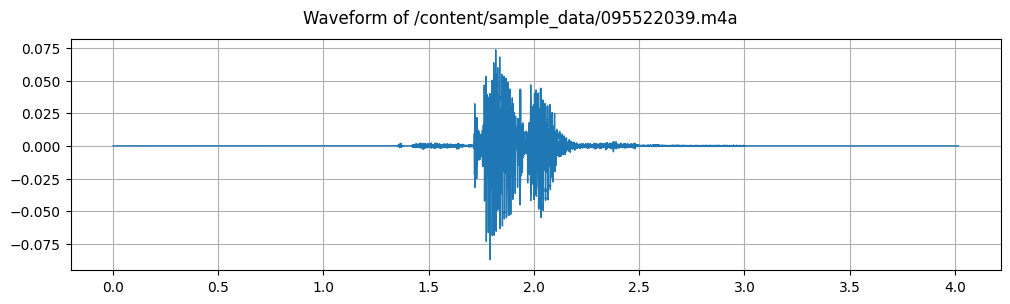

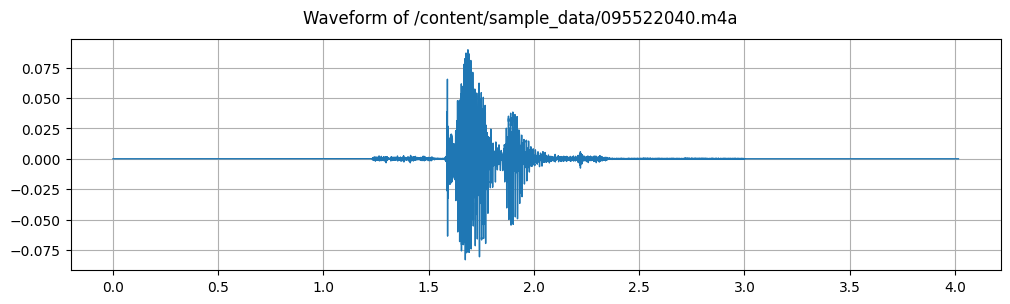

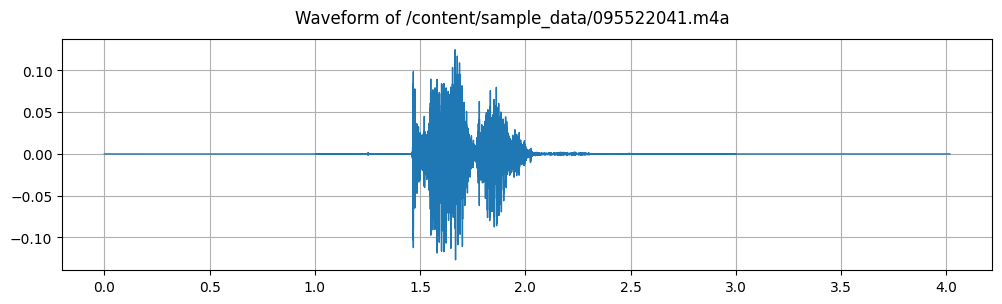

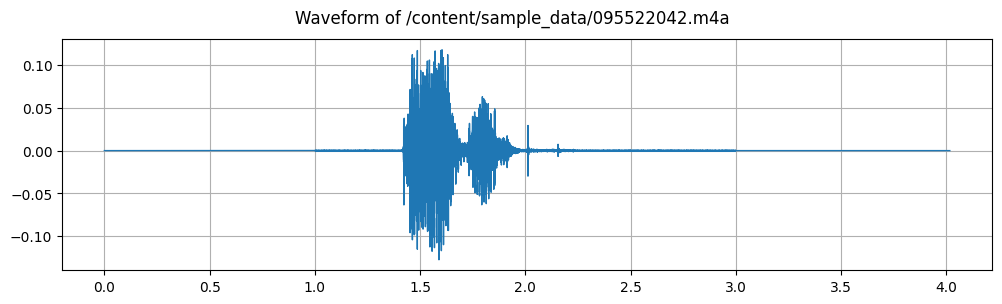

In [36]:

def plot_waveform(waveform, sample_rate, title="Waveform"):
    waveform = waveform.numpy()
    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1, figsize=(12, 3))
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)
    plt.show()

for file_path in audio_files:
    waveform, sample_rate = torchaudio.load(file_path)
    plot_waveform(waveform, sample_rate, title=f"Waveform of {file_path}")


### specgram

--- 각 파일의 Spectrogram을 출력합니다 ---


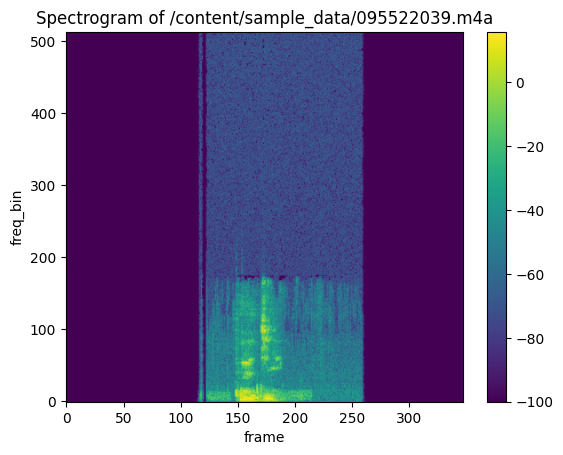

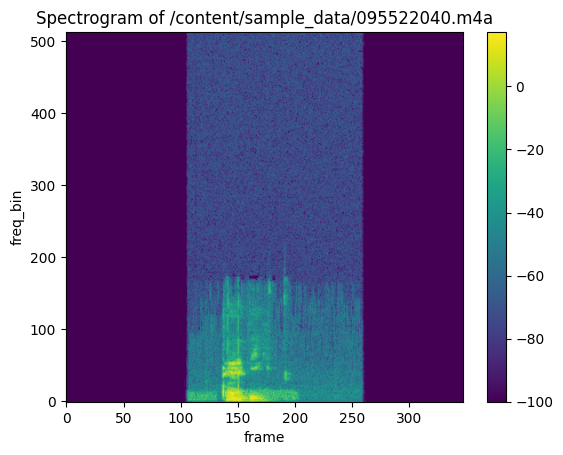

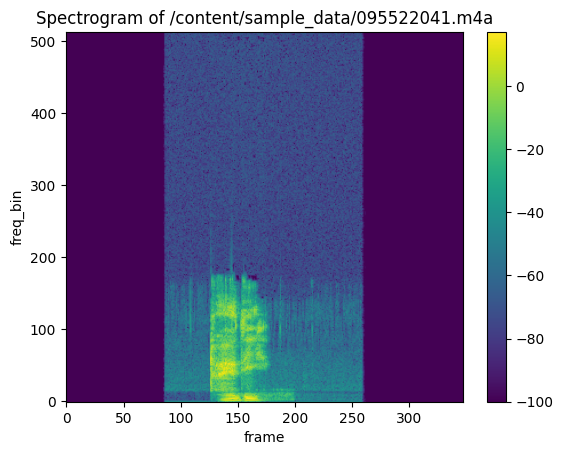

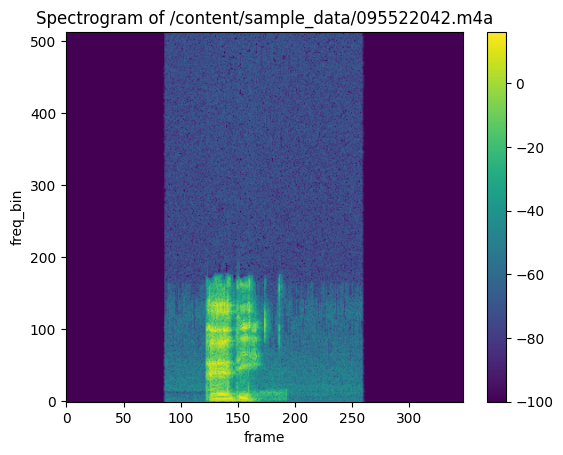

--- Spectrogram 출력이 완료되었습니다 ---


In [37]:
def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(specgram, origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show()



spectrogram_transform = T.Spectrogram(n_fft=1024)
db_transform = T.AmplitudeToDB(stype="power")

for file_path in audio_files:
    waveform, sample_rate = torchaudio.load(file_path)

    spec = spectrogram_transform(waveform)
    db_spec = db_transform(spec)

    plot_spectrogram(db_spec[0].numpy(), title=f"Spectrogram of {file_path}")


### Downsampling

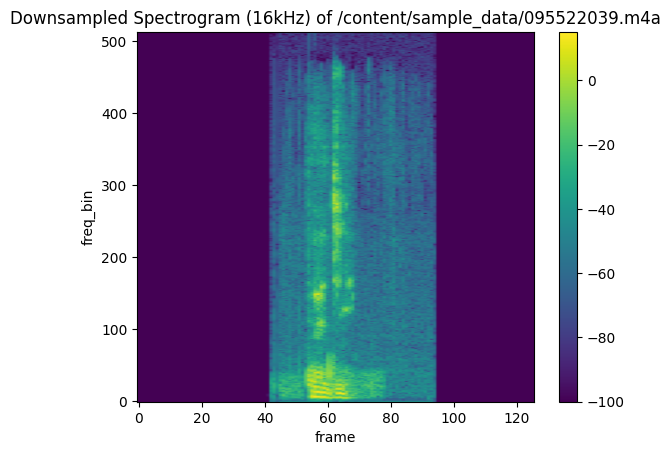

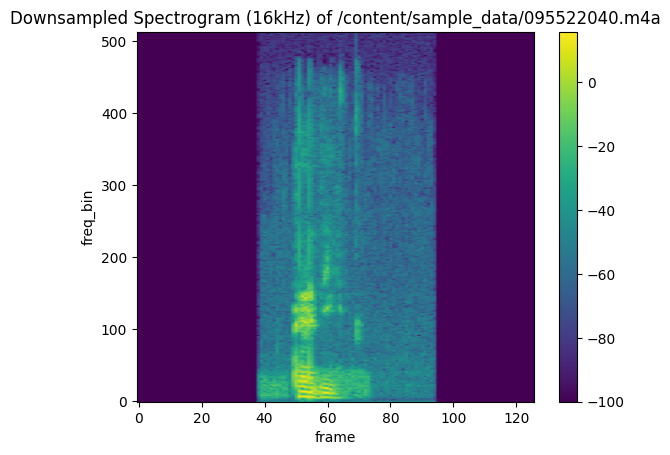

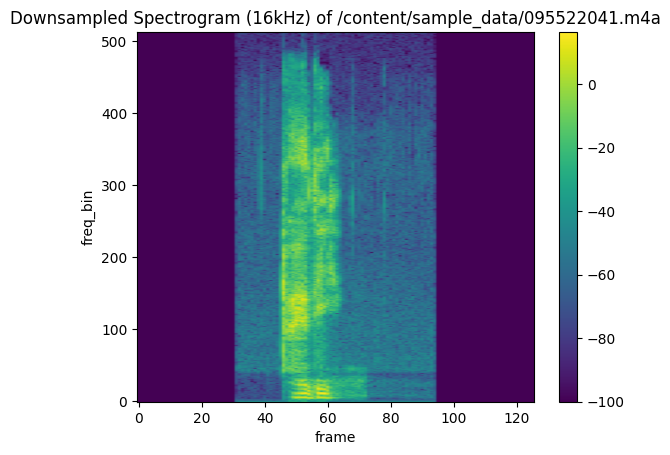

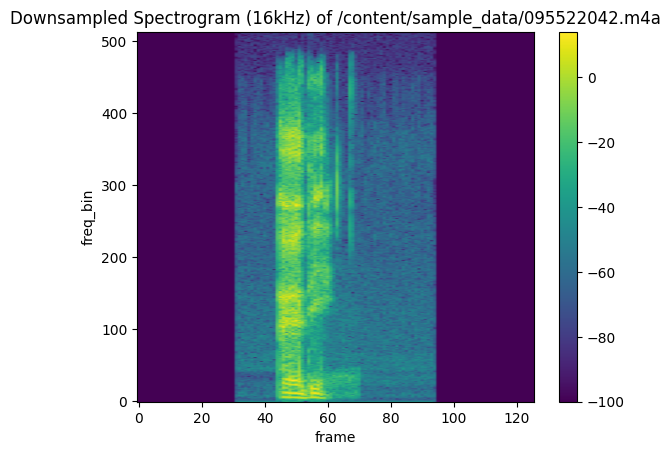

In [42]:
original_sample_rate = sample_rate

new_sample_rate = 16000

resampler = T.Resample(orig_freq = original_sample_rate, new_freq = new_sample_rate)

for file_path in audio_files:
    waveform, sample_rate = torchaudio.load(file_path)

    downsampled_waveform = resampler(waveform)

    downsampled_spec = spectrogram_transform(downsampled_waveform)
    downsampled_db_spec = db_transform(downsampled_spec)

    plot_spectrogram(
        downsampled_db_spec[0].numpy(),
        title=f"Downsampled Spectrogram (16kHz) of {file_path}"
    )


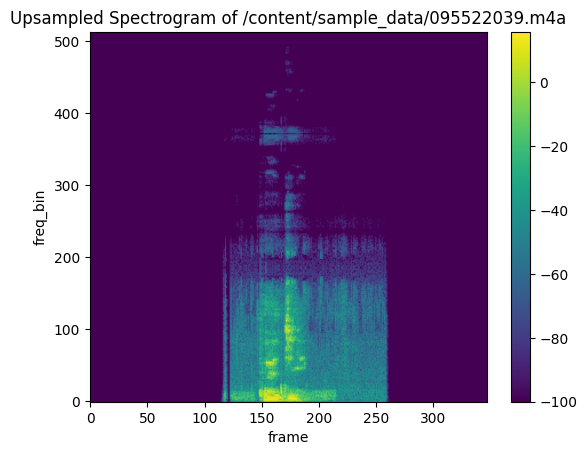

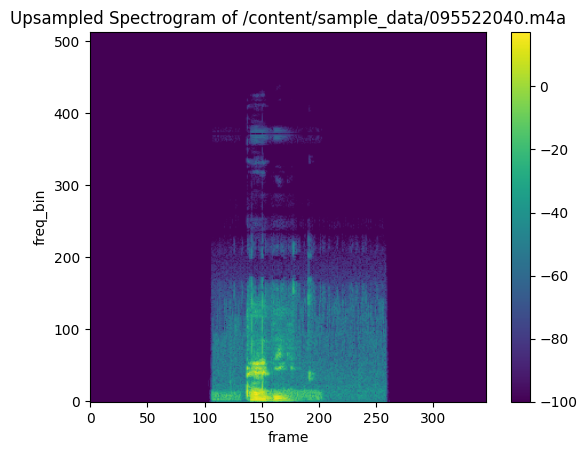

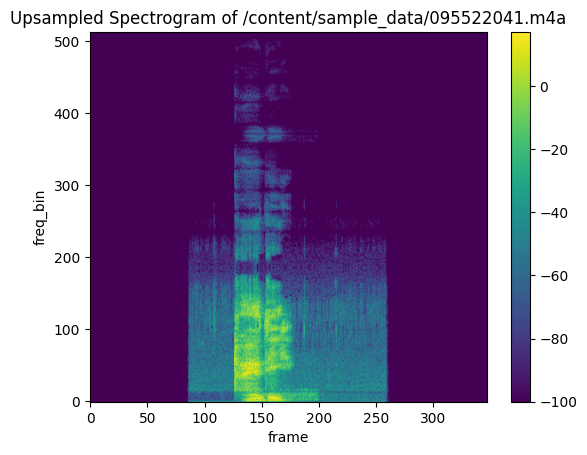

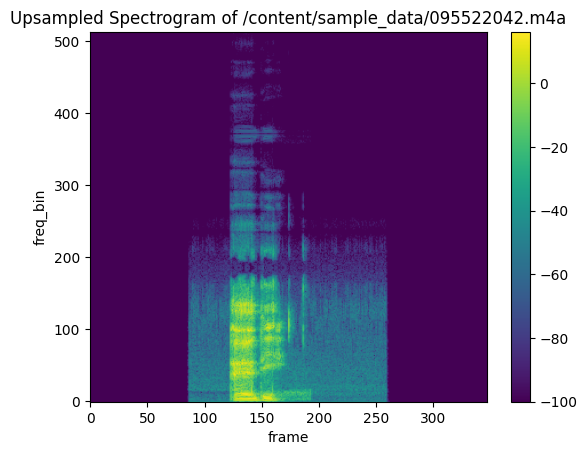

In [47]:
import torchaudio.transforms as T

spectrogram_transform = T.Spectrogram(n_fft=1024)
db_transform = T.AmplitudeToDB(stype="power")

for file_path in audio_files:
    waveform, original_sample_rate = torchaudio.load(file_path)

    downsampler = T.Resample(orig_freq=original_sample_rate, new_freq=new_sample_rate)
    downsampled_waveform = downsampler(waveform)

    upsampler = T.Resample(orig_freq=new_sample_rate, new_freq=original_sample_rate)
    upsampled_waveform = upsampler(downsampled_waveform)

    upsampled_spec = spectrogram_transform(upsampled_waveform)
    upsampled_db_spec = db_transform(upsampled_spec)

    plot_spectrogram(
        upsampled_db_spec[0].numpy(),
        title=f"Upsampled Spectrogram of {file_path}"
    )

